In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

training.columns
test.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [97]:
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [98]:
print("Training missing data")
print(training.isna().sum())
print("Test missing data")
print(test.isna().sum())

Training missing data
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Test missing data
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [99]:
training.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

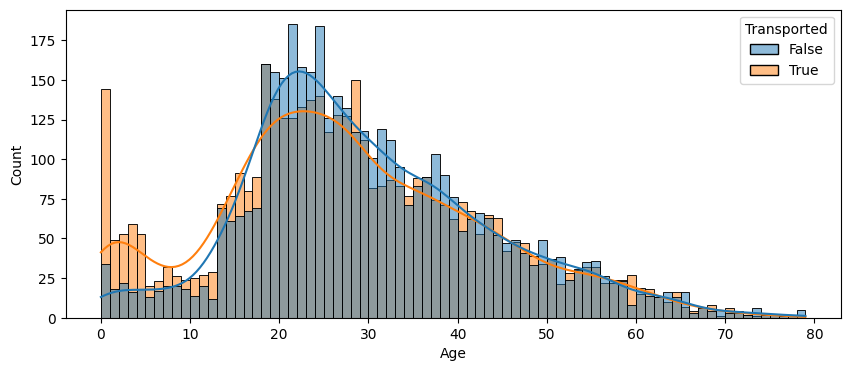

In [100]:
plt.figure(figsize=(10,4))

sns.histplot(data=training, x='Age', hue='Transported', binwidth=1, kde=True)

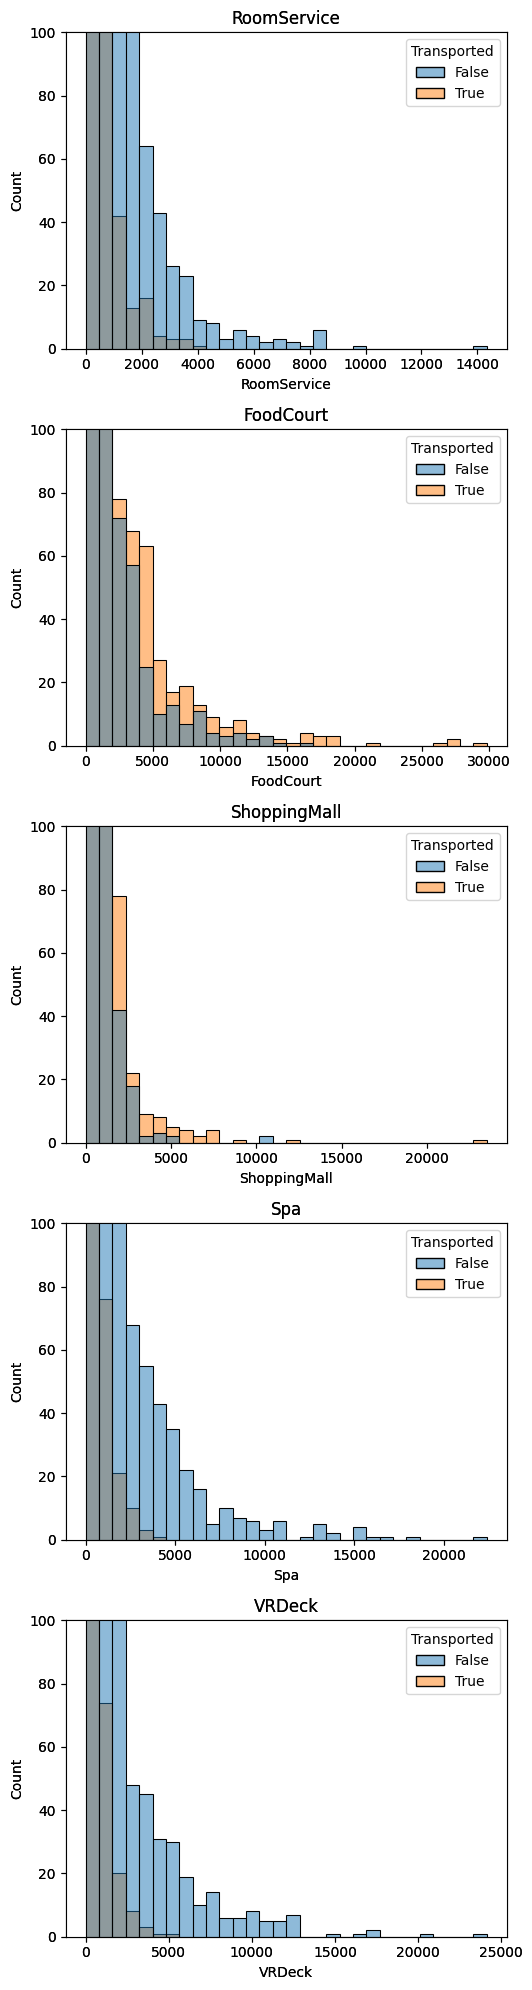

In [101]:
exp_features = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=training, x= var_name, axes=ax, bins=30, kde=False, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)

    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=training, x= var_name, axes=ax, bins=30, kde=False, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()


In [102]:
training['Total_exp']=training[exp_features].sum(axis=1)
training['Spending']=np.where(training['Total_exp']==0, 0,1)

test['Total_exp']=test[exp_features].sum(axis=1)
test['Spending']=np.where(test['Total_exp']==0, 0,1)



<function matplotlib.pyplot.show(close=None, block=None)>

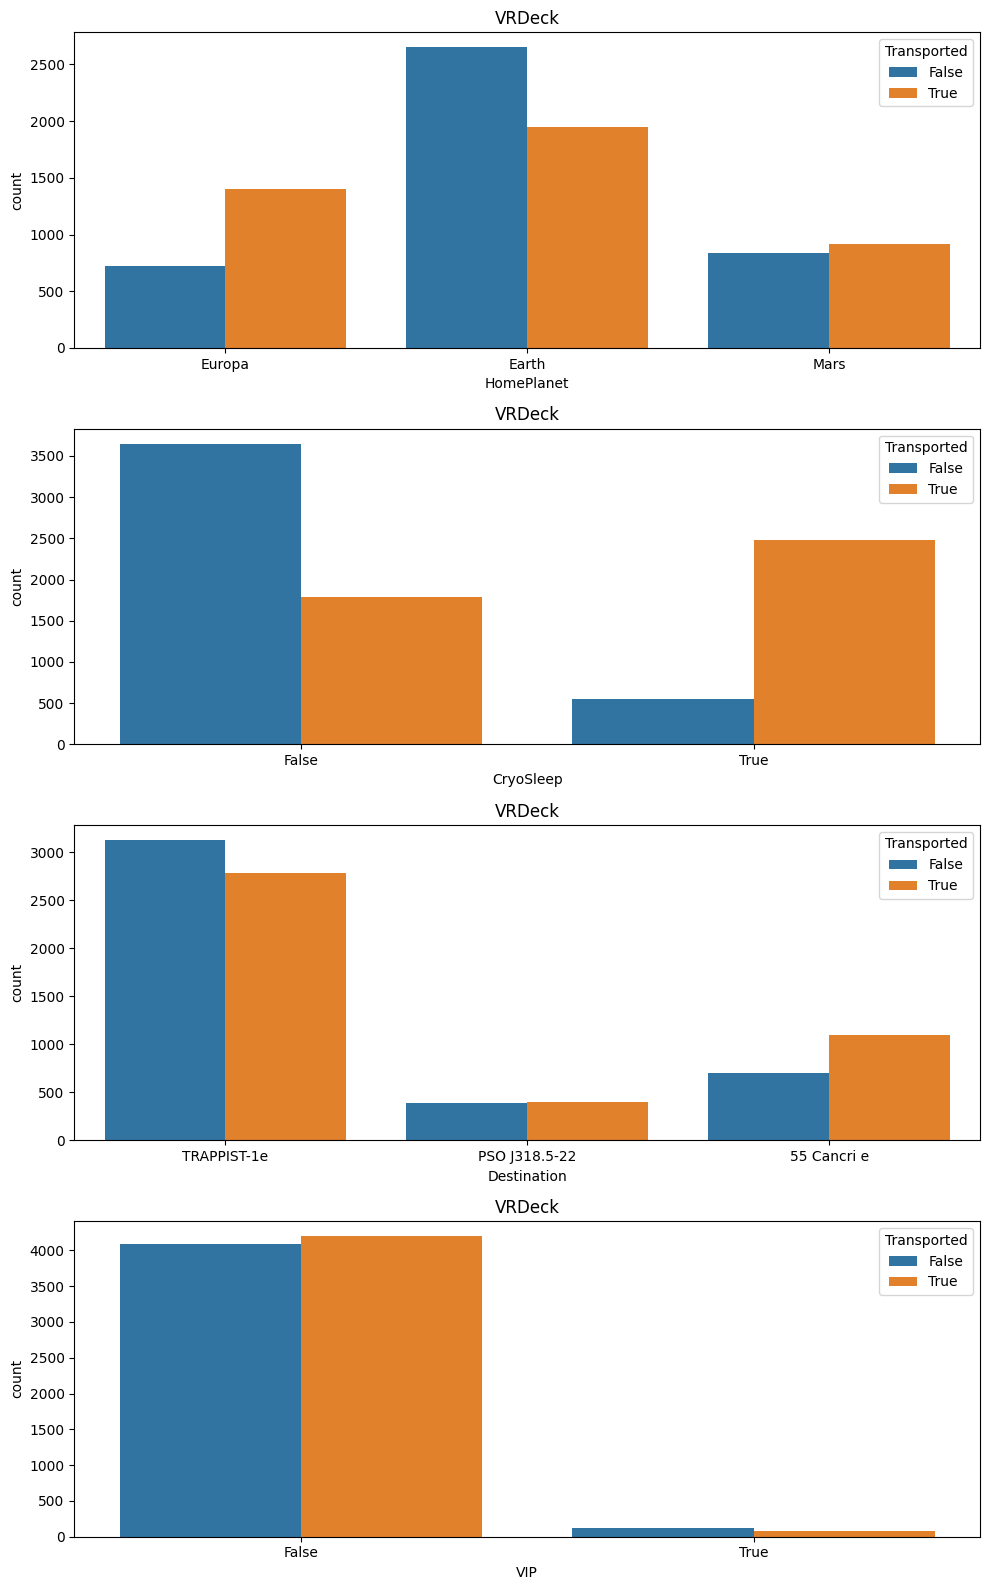

In [103]:
cat_features=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_names in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=training, x=var_names, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show

In [104]:
qual_features=['PassengerId', 'Cabin', 'Name']
training[qual_features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


<function matplotlib.pyplot.show(close=None, block=None)>

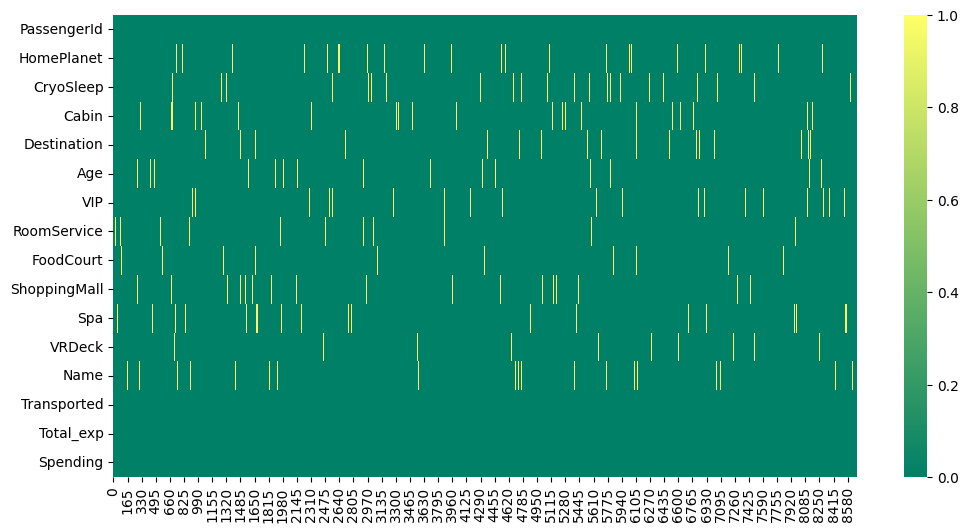

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(training.isna().T, cmap ='summer')
plt.show

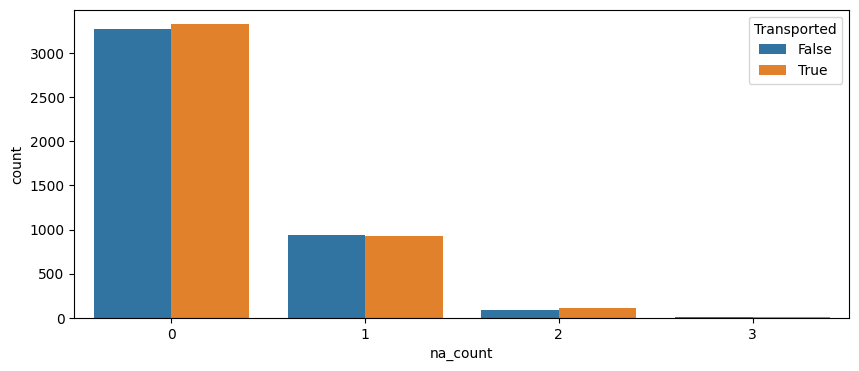

In [106]:
training['na_count']=training.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=training, x='na_count', hue='Transported')
plt.show
training.drop('na_count', axis=1, inplace=True)

In [107]:

training['Age'].fillna(training['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

training[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].mode()

,HomePlanet,CryoSleep,Destination,VIP
0,Earth,False,TRAPPIST-1e,False


In [108]:
training['HomePlanet'].fillna('Earth', inplace=True)
test['HomePlanet'].fillna('Earth', inplace=True)

training['CryoSleep'].fillna('False', inplace=True)
test['CryoSleep'].fillna('False', inplace=True)

training['Destination'].fillna('TRAPPIST-1e', inplace=True)
test['Destination'].fillna('TRAPPIST-1e', inplace=True)

training['VIP'].fillna('False', inplace=True)
test['VIP'].fillna('False', inplace=True)

In [109]:
for col in exp_features:
    training.loc[training[col].isna(),col]=0
    test.loc[test[col].isna(),col]=0

training['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

training['Name'].fillna('No Name', inplace=True)
test['Name'].fillna('No Name', inplace=True)

Text(0.5, 1.0, 'Age distribution')

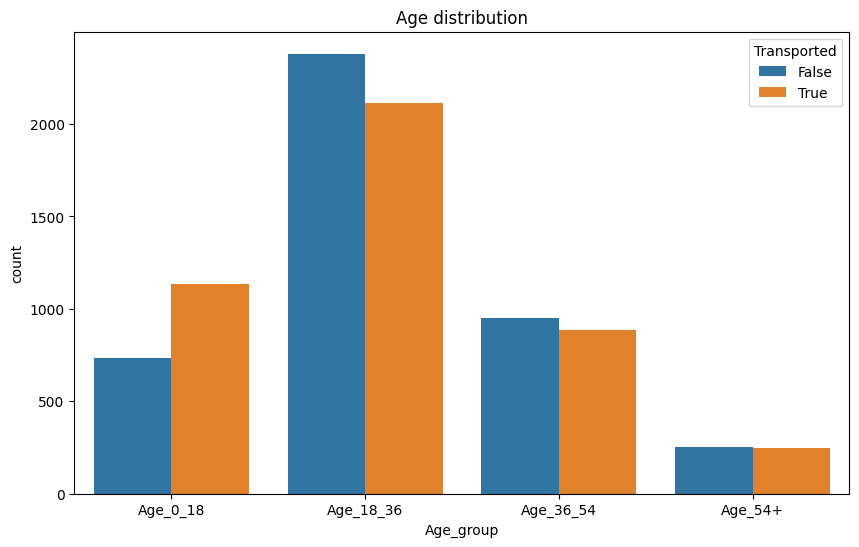

In [110]:

training['Age'] = training['Age'].astype('int64')
test['Age']=pd.to_numeric(test['Age'])
training['Age_group'] = np.nan
training.loc[training['Age']<=18,'Age_group']='Age_0_18'
training.loc[(training['Age']>18) & (training['Age']<=36),'Age_group']='Age_18_36'
training.loc[(training['Age']>36) & (training['Age']<=54),'Age_group']='Age_36_54'
training.loc[training['Age']>54,'Age_group']='Age_54+'

test['Age_group'] = np.nan
test.loc[test['Age']<=18,'Age_group']='Age_0_18'
test.loc[(test['Age']>18) & (test['Age']<=36),'Age_group']='Age_18_36'
test.loc[(test['Age']>36) & (test['Age']<=54),'Age_group']='Age_36_54'
test.loc[test['Age']>54,'Age_group']='Age_54+'
training

plt.figure(figsize=(10,6))
g=sns.countplot(data=training, x='Age_group', hue='Transported', order=['Age_0_18','Age_18_36', 'Age_36_54','Age_54+'])
plt.title('Age distribution')


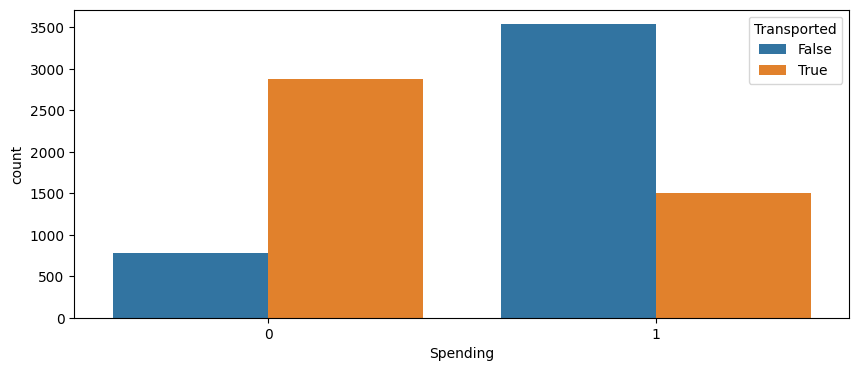

In [111]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=training, x='Spending', hue='Transported')


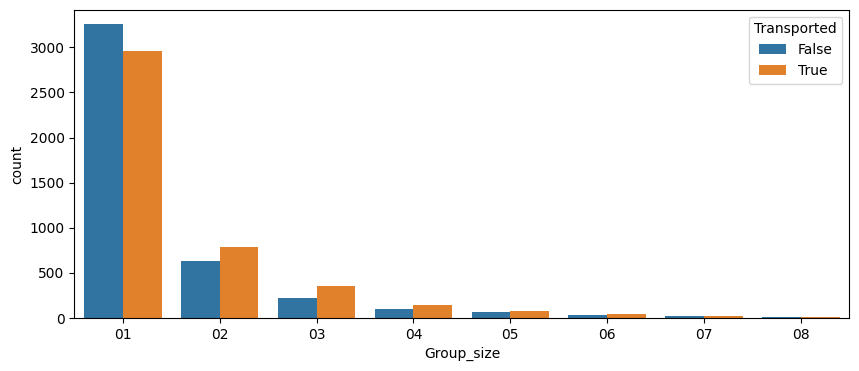

In [117]:
training[['Group','Group_size']]=training['PassengerId'].str.split("_",expand=True)
test[['Group','Group_size']]=test['PassengerId'].str.split("_",expand=True)
plt.figure(figsize=(10,4))
g=sns.countplot(data=training, x='Group_size', hue='Transported')

test['Group']=pd.to_numeric(test['Group'])
test['Group_size']=pd.to_numeric(test['Group_size'])

In [120]:
training[['Cabin_deck','Cabin_number','Cabin_side']]=training['Cabin'].str.split("/",expand=True)
training

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Total_exp,Spending,Age_group,Group,Group_size,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,0,Age_36_54,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,1,Age_18_36,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,1,Age_54+,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,1,Age_18_36,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,1,Age_0_18,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41,True,0.0,6819.0,0.0,...,Gravior Noxnuther,False,8536.0,1,Age_36_54,9276,1,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0.0,0.0,0.0,...,Kurta Mondalley,False,0.0,0,Age_0_18,9278,1,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0.0,0.0,1872.0,...,Fayey Connon,True,1873.0,1,Age_18_36,9279,1,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32,False,0.0,1049.0,0.0,...,Celeon Hontichre,False,4637.0,1,Age_18_36,9280,1,E,608,S
